In [9]:
!git clone https://github.com/DavidReveloLuna/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [10]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 22.0MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [11]:
!pip install tensorflow==2.1

     |████████████████████████████████| 421.8MB 31kB/s 
     |████████████████████████████████| 450kB 50.2MB/s 
     |████████████████████████████████| 3.9MB 39.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=6181f77cf18170476810ccd3251f020b5456dc30fd13c1b3b2da162d3dea7f3f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: 

In [12]:
cd keras-retinanet/

/content/keras-retinanet


In [13]:
!pip install .
!python setup.py build_ext --inplace

Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169697 sha256=822c79b675f6318af039412e528615e6bbb30619ae59a68e5cc78d1eb1975bca
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1
running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.cpython-36m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!cp -r "/content/drive/My Drive/Desarrollos/Pituca Detection/images" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/Desarrollos/Pituca Detection/annotations.csv" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/Desarrollos/Pituca Detection/annotations_test.csv" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/Desarrollos/Pituca Detection/classes.csv" "/content/keras-retinanet" 

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras.models import load_model
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

Using TensorFlow backend.


In [17]:
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, './snapshots/model.h5')


('./snapshots/model.h5', <http.client.HTTPMessage at 0x7f5c15345f60>)

In [18]:
# Entrenamos el modelo
!chmod 777 keras_retinanet/bin/*
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights snapshots/model.h5 --batch-size 8 --steps 200 --epochs 50 csv annotations.csv classes.csv


Using TensorFlow backend.
2020-12-04 06:54:13.793718: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-12-04 06:54:13.793814: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-12-04 06:54:13.793831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Creating model, this may take a second...
2020-12-04 06:54:14.620671: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1


In [19]:
# Con el modelo ya entrenado vamos a realizar predicciones
# Cargamos el modelo entrenado, y lo configuramos para que sea compatible con retinanet
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)


snapshots/resnet50_csv_50.h5
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [

In [20]:
# Cargamos el archivo que contiene las etiquetas de las clases
labels_to_names = pd.read_csv('classes.csv', header=None).T.loc[0].to_dict()


In [21]:
# Cargamos el archivo que contiene la información del dataset de prueba (annotations_test.csv)
test_df = pd.read_csv("annotations_test.csv")
test_df.head()


,images/taro4.jpg,92,337,245,400,Pituca
0,images/images (1).jpg,185,26,220,65,Pituca
1,images/images-21.jpg,94,71,221,213,Pituca
2,images/images (1).jpg,100,72,149,120,Pituca
3,images/descarga.jpg,9,1,92,90,Pituca
4,images/images (1).jpg,169,122,259,169,Pituca


In [22]:
# Obtenemos la predicción del modelo: boxes, scores, labels
import skimage.io as io

def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels


In [23]:
# Mostramos los objetos encontrardos en la imagen
# Se toman encuenta sólo los objetos que tienen asociada una probabilidad mayor a umbralScore
umbralScore = 0.8

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < umbralScore:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)

images/images (1).jpg 0


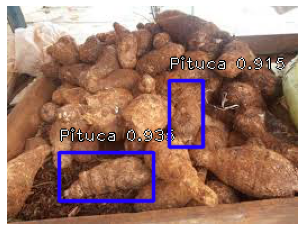

images/images-21.jpg 1


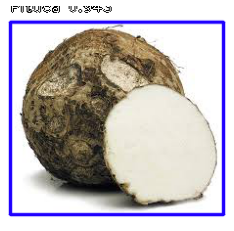

images/images (1).jpg 2


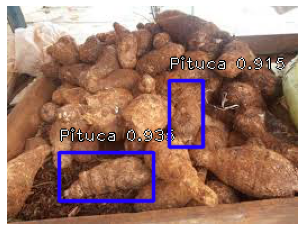

images/descarga.jpg 3


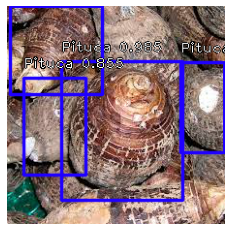

images/images (1).jpg 4


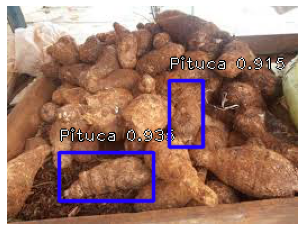

images/01.jpg 5


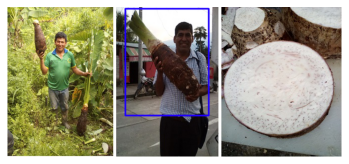

images/images (1).jpg 6


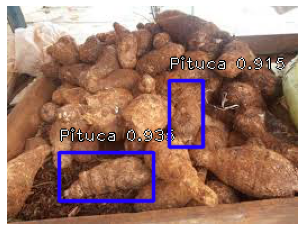

images/images (1).jpg 7


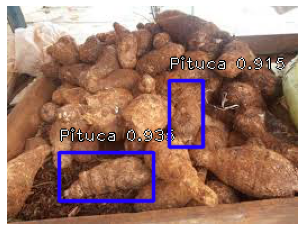

images/descarga (1).jpg 8


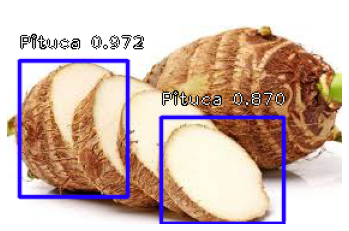

images/malanga.jpg 9


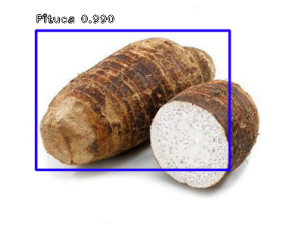

images/TransporteCent.jpg 10


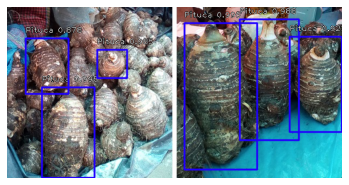

images/taro4.jpg 11


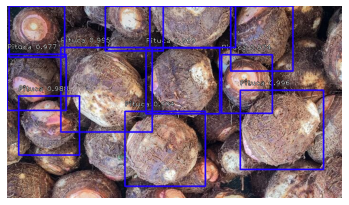

images/descarga (2).jpg 12


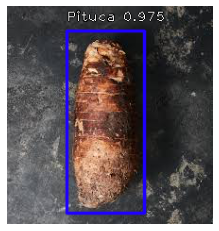

images/01.jpg 13


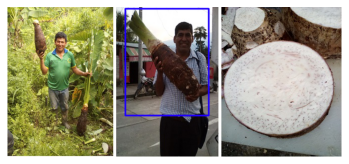

images/ELMO1.jpg 14


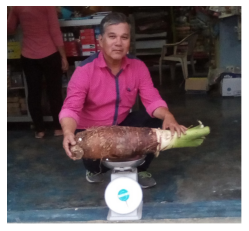

images/450_1000.jpg 15


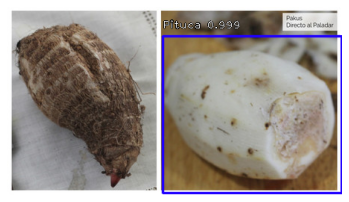

images/images (1).jpg 16


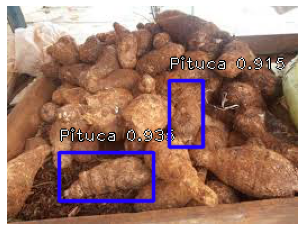

images/tumblr_inline_obnvv3NZCa1sifrny_500.jpg 17


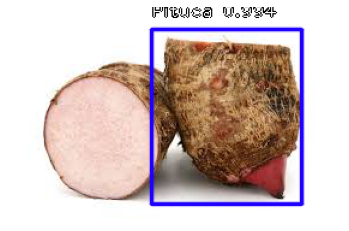

images/images (9).jpg 18


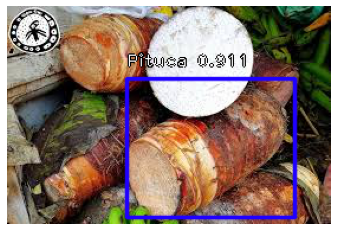

images/images (2).jpg 19


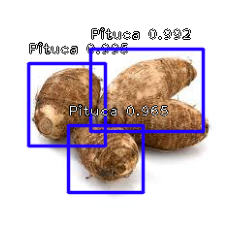

In [24]:
# Recorremos todo el dataFramee de test para revisar las predicciones
for index, row in test_df.iterrows():
  print(row[0], index)
  image = io.imread(row[0])

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()